In [1]:
# import your libraries here
import copy

import numpy as np
import pandas as pd
from gensim.utils import simple_preprocess
import nltk
nltk.download('punkt')
import random
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/santoshsaranyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv("training_data_processed_stop_word_removed.csv")
df = df.drop(columns=["Unnamed: 0"], axis=1)
df.head()

,Artist,SName,Lyric,Genre,LyricProcessed
0,Ivete Sangalo,Careless Whisper,I feel so unsure\nAs I take your hand and lead...,pop,"[['feel', 'unsure'], ['take', 'hand', 'lead', ..."
1,Ivete Sangalo,Could You Be Loved / Citação Musical do Rap: S...,"Don't let them fool, ya\nOr even try to school...",pop,"[['let', 'fool', 'ya'], ['even', 'try', 'schoo..."
2,Ivete Sangalo,Cruisin' (Part. Saulo),"Baby, let's cruise, away from here\nDon't be c...",pop,"[['baby', 'let', 'cruise', 'away'], ['confuse'..."
3,Ivete Sangalo,Easy,"Know it sounds funny\nBut, I just can't stand ...",pop,"[['know', 'sound', 'funny'], ['cant', 'stand',..."
4,Ivete Sangalo,For Your Babies (The Voice cover),You've got that look again\nThe one I hoped I ...,pop,"[['get', 'look'], ['one', 'hop', 'lad'], ['fac..."


In [3]:
df['Genre'] = df['Genre'].str.lower()
df['Genre'] = df['Genre'].apply(lambda x: "punk" if "punk" in x else x)
df['Genre'] = df['Genre'].apply(lambda x: "rock" if "rock" in x else x)
df['Genre'] = df['Genre'].apply(lambda x: "jazz" if "jazz" in x else x)
df['Genre'] = df['Genre'].apply(lambda x: "pop" if "pop" in x else x)
df['Genre'] = df['Genre'].apply(lambda x: "metal" if "metal" in x else x)
df['Genre'] = df['Genre'].apply(lambda x: "rap" if "rap" in x else x)
df['Genre'] = df['Genre'].apply(lambda x: "hip-hop" if ("hip-hop" in x or "hip hop" in x or "hiphop" in x) else x)
df['Genre'] = df['Genre'].apply(lambda x: "country" if "country" in x else x)
df['Genre'] = df['Genre'].apply(lambda x: "rnb" if ("rnb" == x or "r&b" in x or "r n b" in x or "r & b" in x or "rhythum and blues tag" in x or "rhythm & blues" in x or "rhythm and blues" in x or "rhythm n blues" in x) else x)
df['Genre'] = df['Genre'].apply(lambda x: "electronic" if ("house" == x or "trance" == x or "dance" == x or "chillout" == x or "drum and bass" == x or "disco" == x or "dubstep" == x) else x)
df = df.groupby('Genre').filter(lambda x: len(x) > 1650)
print("Number of genres: ",df['Genre'].nunique())
df['Genre'].value_counts()

Number of genres:  16


rock           29916
metal          19420
pop            12812
hip-hop        10333
indie           6020
electronic      5866
rap             4535
rnb             4271
soul            3739
punk            3440
country         3135
jazz            2969
folk            2724
alternative     1994
blues           1838
reggae          1697
Name: Genre, dtype: int64

In [4]:
df['LyricsList'] = df.apply(lambda x: eval(x['LyricProcessed']), axis=1)
df.head()

,Artist,SName,Lyric,Genre,LyricProcessed,LyricsList
0,Ivete Sangalo,Careless Whisper,I feel so unsure\nAs I take your hand and lead...,pop,"[['feel', 'unsure'], ['take', 'hand', 'lead', ...","[[feel, unsure], [take, hand, lead, dance, flo..."
1,Ivete Sangalo,Could You Be Loved / Citação Musical do Rap: S...,"Don't let them fool, ya\nOr even try to school...",pop,"[['let', 'fool', 'ya'], ['even', 'try', 'schoo...","[[let, fool, ya], [even, try, school, ya, oh],..."
2,Ivete Sangalo,Cruisin' (Part. Saulo),"Baby, let's cruise, away from here\nDon't be c...",pop,"[['baby', 'let', 'cruise', 'away'], ['confuse'...","[[baby, let, cruise, away], [confuse, way, cle..."
3,Ivete Sangalo,Easy,"Know it sounds funny\nBut, I just can't stand ...",pop,"[['know', 'sound', 'funny'], ['cant', 'stand',...","[[know, sound, funny], [cant, stand, pain], [g..."
4,Ivete Sangalo,For Your Babies (The Voice cover),You've got that look again\nThe one I hoped I ...,pop,"[['get', 'look'], ['one', 'hop', 'lad'], ['fac...","[[get, look], [one, hop, lad], [face, beam], [..."


In [6]:
processed_lyrics = df['LyricsList'].explode().to_list()
processed_lyrics[:5]

[['feel', 'unsure'],
 ['take', 'hand', 'lead', 'dance', 'floor'],
 ['music', 'dy', 'something', 'eye'],
 ['call', 'mind', 'silver', 'screen'],
 ['sad', 'goodbye']]

In [29]:
w2v_model = Word2Vec(sentences = processed_lyrics, vector_size=200, sg = 1, window = 3, min_count = 2, epochs = 100)

In [30]:
len(w2v_model.wv)

102912

In [51]:
# Visualize for W2V MODEL

# Selecting a subset of the word embeddings
keys = ['crazy', 'face', 'caught', 'fool', 'gold', 'love', 'rock', 'hell']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in w2v_model.wv.most_similar(word, topn=25):
        words.append(similar_word)
        embeddings.append(w2v_model.wv[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [52]:
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

/Users/santoshsaranyan/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/santoshsaranyan/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


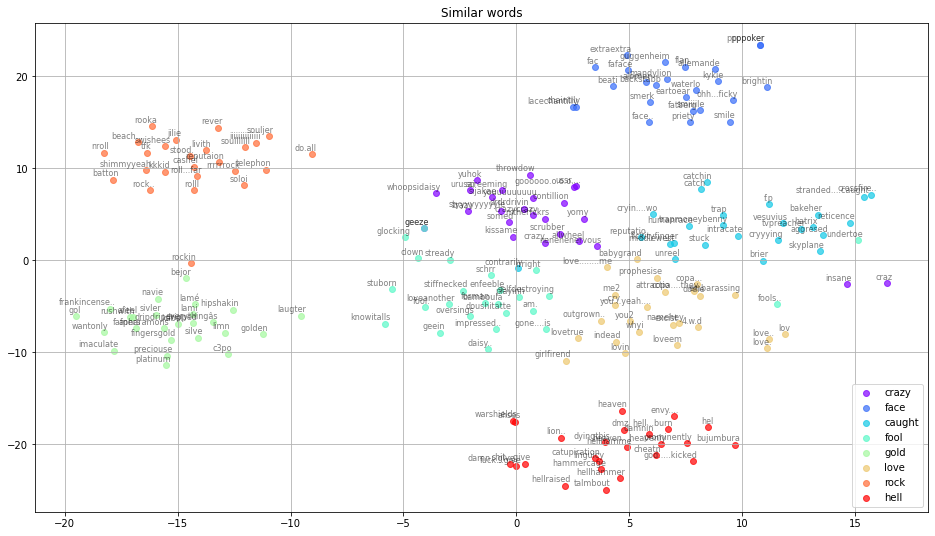

In [53]:
# % matplotlib inline
def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, color=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

In [31]:
w2v_model.wv.save_word2vec_format('w2v_embeddings.txt', binary = False)

In [ ]:
from gensim import models
glove_model = models.KeyedVectors.load_word2vec_format("glove.6B.200d.txt", binary=False, no_header=True)

In [31]:
# Visualize for Glove MODEL

# Selecting a subset of the word embeddings
keys = ['crazy', 'face', 'caught', 'fool', 'gold', 'love', 'rock', 'hell']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in glove_model.most_similar(word, topn=25):
        words.append(similar_word)
        embeddings.append(glove_model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [32]:
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

/Users/santoshsaranyan/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/santoshsaranyan/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


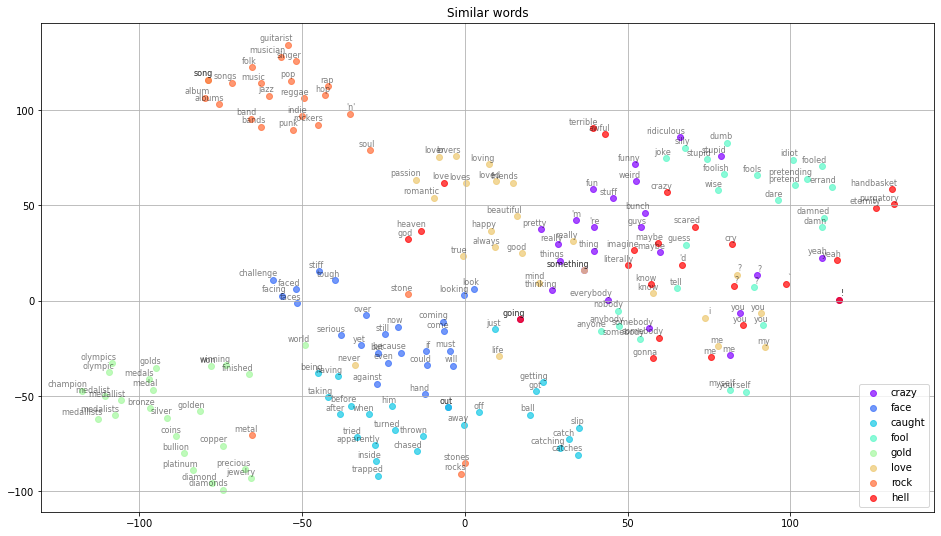

In [33]:
# % matplotlib inline
def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, color=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

In [5]:
df['LyricsProcessed'] = df['LyricsList'].apply(lambda x: (' '.join(list(map(' '.join, x)))))

In [6]:
df.head()

,Artist,SName,Lyric,Genre,LyricProcessed,LyricsList,LyricsProcessed
0,Ivete Sangalo,Careless Whisper,I feel so unsure\nAs I take your hand and lead...,pop,"[['feel', 'unsure'], ['take', 'hand', 'lead', ...","[[feel, unsure], [take, hand, lead, dance, flo...",feel unsure take hand lead dance floor music d...
1,Ivete Sangalo,Could You Be Loved / Citação Musical do Rap: S...,"Don't let them fool, ya\nOr even try to school...",pop,"[['let', 'fool', 'ya'], ['even', 'try', 'schoo...","[[let, fool, ya], [even, try, school, ya, oh],...",let fool ya even try school ya oh weve get min...
2,Ivete Sangalo,Cruisin' (Part. Saulo),"Baby, let's cruise, away from here\nDon't be c...",pop,"[['baby', 'let', 'cruise', 'away'], ['confuse'...","[[baby, let, cruise, away], [confuse, way, cle...",baby let cruise away confuse way clear want ge...
3,Ivete Sangalo,Easy,"Know it sounds funny\nBut, I just can't stand ...",pop,"[['know', 'sound', 'funny'], ['cant', 'stand',...","[[know, sound, funny], [cant, stand, pain], [g...",know sound funny cant stand pain girl im leave...
4,Ivete Sangalo,For Your Babies (The Voice cover),You've got that look again\nThe one I hoped I ...,pop,"[['get', 'look'], ['one', 'hop', 'lad'], ['fac...","[[get, look], [one, hop, lad], [face, beam], [...",get look one hop lad face beam smile get boast...


In [8]:
genre_df = df.groupby(['Genre'])['LyricsProcessed'].apply(' '.join).reset_index()
genre_df.head()

,Genre,LyricsProcessed
0,alternative,ten time nine know lie nine time outta ten kno...
1,blues,heard church bell ring heard choir sing saw lo...
2,country,yeehaw oh oh oh texas texas oh oh oh texas com...
3,electronic,ready dance make body crazy let show do brazil...
4,folk,one last drink wishful thinkin another bar get...


In [26]:
from nltk.corpus import stopwords
nltk.download('stopwords')
all_stopwords = stopwords.words('english')
all_stopwords.append('go')
all_stopwords.append('im')
all_stopwords.append('get')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/santoshsaranyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
tfidf_vectorizer = TfidfVectorizer(stop_words=all_stopwords)
genre_tfidf = tfidf_vectorizer.fit_transform(genre_df['LyricsProcessed'])
feature_names = tfidf_vectorizer.get_feature_names()
genre_dense = genre_tfidf.todense()
genre_denselist = genre_dense.tolist()
genre_dense_df = pd.DataFrame(genre_denselist, columns=feature_names)
genre_dense_df.head()

/Users/santoshsaranyan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,0000,00000,000000,0000000,00000000,000000000,0000000000,00000000000,...,올라,잡으면,진실이,천천히,함께,현실,흐름을,ﬁnd,ﬁne,ﬂash
0,0.0,0.000290,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000653,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
genre_dense_df_transpose = genre_dense_df.transpose()
genre_dense_df_transpose.columns = genre_df['Genre'].to_list()
genre_dense_df_transpose.head()

,alternative,blues,country,electronic,folk,hip-hop,indie,jazz,metal,pop,punk,rap,reggae,rnb,rock,soul
00,0.00000,0.0,0.0,0.000000,0.0,0.000033,0.000075,0.000000,0.000990,0.000109,0.0,0.000000,0.000000,0.000000,0.000153,0.000000
000,0.00029,0.0,0.0,0.000653,0.0,0.000283,0.000047,0.000108,0.000930,0.000299,0.0,0.000301,0.000104,0.000208,0.000164,0.000089
0000,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.001972,0.000000,0.0,0.000000,0.000000,0.000000,0.000037,0.000000
00000,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000820,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
000000,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000952,0.000000,0.0,0.000000,0.000000,0.000000,0.000037,0.000000


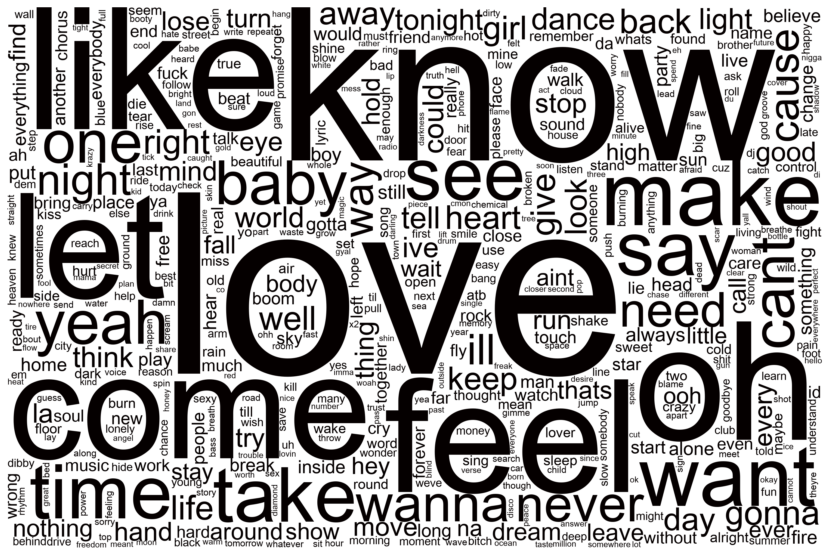

In [36]:
# change the value to black
def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")
# set the wordcloud background color to white
# set max_words to 1000
# set width and height to higher quality, 3000 x 2000
wordcloud = WordCloud(font_path = '/Library/Fonts/Arial Unicode.ttf', background_color="white", width=3000, height=2000, max_words=500).generate_from_frequencies(genre_dense_df_transpose['pop'])
# set the word color to black
wordcloud.recolor(color_func = black_color_func)
# set the figsize
plt.figure(figsize=[15,10])
# plot the wordcloud
plt.imshow(wordcloud, interpolation="bilinear")
# remove plot axes
plt.axis("off")
# Save the plot
plt.savefig('pop_wordcloud.png')

In [9]:
df.head()

,Artist,SName,Lyric,Genre,LyricProcessed,LyricsList,LyricsProcessed
0,Ivete Sangalo,Careless Whisper,I feel so unsure\nAs I take your hand and lead...,pop,"[['feel', 'unsure'], ['take', 'hand', 'lead', ...","[[feel, unsure], [take, hand, lead, dance, flo...",feel unsure take hand lead dance floor music d...
1,Ivete Sangalo,Could You Be Loved / Citação Musical do Rap: S...,"Don't let them fool, ya\nOr even try to school...",pop,"[['let', 'fool', 'ya'], ['even', 'try', 'schoo...","[[let, fool, ya], [even, try, school, ya, oh],...",let fool ya even try school ya oh weve get min...
2,Ivete Sangalo,Cruisin' (Part. Saulo),"Baby, let's cruise, away from here\nDon't be c...",pop,"[['baby', 'let', 'cruise', 'away'], ['confuse'...","[[baby, let, cruise, away], [confuse, way, cle...",baby let cruise away confuse way clear want ge...
3,Ivete Sangalo,Easy,"Know it sounds funny\nBut, I just can't stand ...",pop,"[['know', 'sound', 'funny'], ['cant', 'stand',...","[[know, sound, funny], [cant, stand, pain], [g...",know sound funny cant stand pain girl im leave...
4,Ivete Sangalo,For Your Babies (The Voice cover),You've got that look again\nThe one I hoped I ...,pop,"[['get', 'look'], ['one', 'hop', 'lad'], ['fac...","[[get, look], [one, hop, lad], [face, beam], [...",get look one hop lad face beam smile get boast...


In [7]:
from sklearn import preprocessing
LabelEnc = preprocessing.LabelEncoder()
df['GenreEncoded'] = LabelEnc.fit_transform(df['Genre'])


In [8]:
df.head()

,Artist,SName,Lyric,Genre,LyricProcessed,LyricsList,LyricsProcessed,GenreEncoded
0,Ivete Sangalo,Careless Whisper,I feel so unsure\nAs I take your hand and lead...,pop,"[['feel', 'unsure'], ['take', 'hand', 'lead', ...","[[feel, unsure], [take, hand, lead, dance, flo...",feel unsure take hand lead dance floor music d...,9
1,Ivete Sangalo,Could You Be Loved / Citação Musical do Rap: S...,"Don't let them fool, ya\nOr even try to school...",pop,"[['let', 'fool', 'ya'], ['even', 'try', 'schoo...","[[let, fool, ya], [even, try, school, ya, oh],...",let fool ya even try school ya oh weve get min...,9
2,Ivete Sangalo,Cruisin' (Part. Saulo),"Baby, let's cruise, away from here\nDon't be c...",pop,"[['baby', 'let', 'cruise', 'away'], ['confuse'...","[[baby, let, cruise, away], [confuse, way, cle...",baby let cruise away confuse way clear want ge...,9
3,Ivete Sangalo,Easy,"Know it sounds funny\nBut, I just can't stand ...",pop,"[['know', 'sound', 'funny'], ['cant', 'stand',...","[[know, sound, funny], [cant, stand, pain], [g...",know sound funny cant stand pain girl im leave...,9
4,Ivete Sangalo,For Your Babies (The Voice cover),You've got that look again\nThe one I hoped I ...,pop,"[['get', 'look'], ['one', 'hop', 'lad'], ['fac...","[[get, look], [one, hop, lad], [face, beam], [...",get look one hop lad face beam smile get boast...,9


In [9]:
from gensim import models
w2v_path = 'w2v_Embeddings.txt'
w2v_model = models.KeyedVectors.load_word2vec_format(w2v_path, binary=False)

In [22]:
glove_model = models.KeyedVectors.load_word2vec_format("glove.6B.200d.txt", binary=False, no_header=True)

In [10]:
def token_to_index(token):
    try:
        return w2v_model.key_to_index[token]
    except KeyError:
        return 0  # Index of 0 for unknown words

In [23]:
def token_to_index_glove(token):
    try:
        return glove_model.key_to_index[token]
    except KeyError:
        return 0  # Index of 0 for unknown words

In [24]:
from sklearn.model_selection import train_test_split

model_selection = "glove"

label_final = df['GenreEncoded']
label_final = label_final.drop(88392)
df_lyrics = df['LyricsProcessed'].apply(lambda x: x.split())
df_lyrics = df_lyrics.drop(88392)
if model_selection == "w2v":
    df_indices = df_lyrics.apply(lambda x: [token_to_index(token) for token in x])
else:
    df_indices = df_lyrics.apply(lambda x: [token_to_index_glove(token) for token in x])
df_train_valid, df_test, label_train_valid, label_test = train_test_split(df_indices.to_list(), label_final.to_list(), test_size=0.10, random_state=7)
df_train, df_valid, label_train, label_valid = train_test_split(df_train_valid, label_train_valid, test_size=0.10, random_state=7)

In [25]:
from torch.utils.data import Dataset

class TextDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        return torch.tensor(self.X[index]), torch.tensor(self.y[index])

train_dataset = TextDataset(df_train, label_train)
valid_dataset = TextDataset(df_valid, label_valid)
test_dataset = TextDataset(df_test, label_test)


In [26]:
import torch
import torch.nn as nn
import torch.nn.utils.rnn as rnn_utils
from torch.utils.data import DataLoader
device = 'cpu'
batch_size = 32

def collate_batch(batch):
    X = [torch.tensor(item[0], dtype=torch.long) for item in batch]
    y = torch.tensor([item[1] for item in batch], dtype=torch.long)
    X_padded = rnn_utils.pad_sequence(X, batch_first=True, padding_value=0)
    lengths = torch.LongTensor([len(x) for x in X])
    return X_padded.to(device), y.to(device), lengths.to(device)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_batch)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, collate_fn=collate_batch)
test_loader = DataLoader(test_dataset, batch_size=batch_size, collate_fn=collate_batch)



In [27]:
class LSTM(nn.Module):
    def __init__(self, given_model, num_classes, hidden_size=64, num_layers=2):
        super(LSTM, self).__init__()
        self.embedding_dim = given_model.vector_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.embedding = nn.Embedding.from_pretrained(torch.FloatTensor(given_model.vectors))
        self.lstm = nn.LSTM(self.embedding_dim, self.hidden_size, num_layers=self.num_layers, batch_first=True)
        self.fc = nn.Linear(self.hidden_size, num_classes)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x, lengths):
        x = self.embedding(x)
        x = self.dropout(x)
        packed_seq = rnn_utils.pack_padded_sequence(x, lengths, batch_first=True, enforce_sorted=False)
        _, (hidden, _) = self.lstm(packed_seq)
        output = self.fc(hidden[-1])
        return output.squeeze(0)


In [28]:
def train_model(model, num_epochs, adam_optimizer, training_loss_list, loss_fn, validation_loss_list, validation_accuracy_list, best_accuracy=0, best_weights=None):
    for epoch in range(num_epochs):
        print("Epoch :", epoch)
        model.train()
        training_loss = 0
        current_batch = 0
        for inputs, labels, lengths in train_loader:
            if current_batch % 500 == 0:
                print('Current batch: {} / {}'.format(current_batch + 1, len(train_loader)))
            current_batch += 1
            adam_optimizer.zero_grad()
            outputs = model(inputs, lengths)
            loss = loss_fn(outputs, labels)
            loss.backward()
            adam_optimizer.step()
            training_loss = training_loss + (loss.item() * inputs.size(0))
        training_loss = training_loss/len(train_loader.dataset)
        training_loss_list.append(training_loss)
        print("Training Loss: ", training_loss)

        model.eval()
        validation_loss = 0
        correct = 0
        total = 0
        current_batch = 0
        with torch.no_grad():
            for inputs, labels, lengths in valid_loader:
                if current_batch % 500 == 0:
                    print('Current batch: {} / {}'.format(current_batch+1, len(valid_loader)))
                current_batch += 1
                outputs = model(inputs, lengths)
                loss = loss_fn(outputs, labels)
                validation_loss = validation_loss + (loss.item()*inputs.size(0))
                _, predicted = outputs.max(1)
                total = total + labels.size(0)
                correct = correct + predicted.eq(labels).sum().item()
        validation_loss = validation_loss/len(valid_loader.dataset)
        validation_loss_list.append(validation_loss)
        validation_accuracy = correct/total
        validation_accuracy_list.append(validation_accuracy)

        if validation_accuracy > best_accuracy:
            best_accuracy = validation_accuracy
            best_weights = copy.deepcopy(model.state_dict())

        print('Epoch [{}/{}], Train Loss: {:.4f}, Val Loss: {:.4f}, Val Acc: {:.2f}%'
              .format(epoch+1, num_epochs, training_loss, validation_loss, 100*validation_accuracy))
    return best_weights

In [15]:
import torch.optim as optim
# Training model with w2v embeddings
learning_rate = 0.001
num_epochs = 25
hidden_size = 64
num_layers = 2
num_classes = len(set(label_final))

training_loss_list = []
validation_loss_list = []
validation_accuracy_list = []

best_accuracy = 0
best_weights = None

model = LSTM(w2v_model, num_classes, hidden_size=hidden_size, num_layers=num_layers)
adam_optimizer = optim.Adam(model.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

best_weights=train_model(model, num_epochs, adam_optimizer, training_loss_list, loss_fn, validation_loss_list, validation_accuracy_list, best_accuracy, best_weights)

model.load_state_dict(best_weights)
torch.save(model.state_dict(), 'LSTM_with_w2v.pth')

Epoch : 0
Current batch: 1 / 2904


<ipython-input-13-d4135abbdb5c>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = [torch.tensor(item[0], dtype=torch.long) for item in batch]


Current batch: 501 / 2904
Current batch: 1001 / 2904
Current batch: 1501 / 2904
Current batch: 2001 / 2904
Current batch: 2501 / 2904
Training Loss:  2.0253612697923162
Current batch: 1 / 323
Epoch [1/25], Train Loss: 2.0254, Val Loss: 1.9221, Val Acc: 40.62%
Epoch : 1
Current batch: 1 / 2904
Current batch: 501 / 2904
Current batch: 1001 / 2904
Current batch: 1501 / 2904
Current batch: 2001 / 2904
Current batch: 2501 / 2904
Training Loss:  1.8078923272797611
Current batch: 1 / 323
Epoch [2/25], Train Loss: 1.8079, Val Loss: 1.7703, Val Acc: 43.08%
Epoch : 2
Current batch: 1 / 2904
Current batch: 501 / 2904
Current batch: 1001 / 2904
Current batch: 1501 / 2904
Current batch: 2001 / 2904
Current batch: 2501 / 2904
Training Loss:  1.7051726142784807
Current batch: 1 / 323
Epoch [3/25], Train Loss: 1.7052, Val Loss: 1.6937, Val Acc: 44.37%
Epoch : 3
Current batch: 1 / 2904
Current batch: 501 / 2904
Current batch: 1001 / 2904
Current batch: 1501 / 2904
Current batch: 2001 / 2904
Current bat

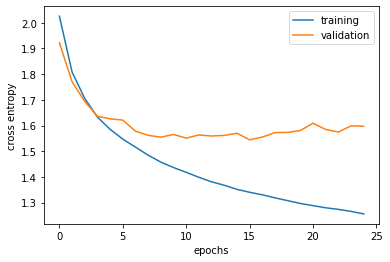

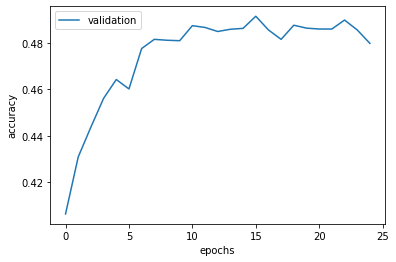

<Figure size 432x288 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt

plt.plot(training_loss_list, label="training")
plt.plot(validation_loss_list, label="validation")
plt.xlabel("epochs")
plt.ylabel("cross entropy")
plt.legend()
plt.show()
plt.savefig('Loss.png')

plt.plot(validation_accuracy_list, label="validation")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()
plt.savefig('Accuracy.png')

In [29]:
import torch.optim as optim
# Training model with glove embeddings
learning_rate = 0.001
num_epochs = 20
hidden_size = 64
num_layers = 2
num_classes = len(set(label_final))

training_loss_list = []
validation_loss_list = []
validation_accuracy_list = []

best_accuracy = 0
best_weights = None

model = LSTM(glove_model, num_classes, hidden_size=hidden_size, num_layers=num_layers)
adam_optimizer = optim.Adam(model.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

best_weights=train_model(model, num_epochs, adam_optimizer, training_loss_list, loss_fn, validation_loss_list, validation_accuracy_list, best_accuracy, best_weights)

model.load_state_dict(best_weights)
torch.save(model.state_dict(), 'LSTM_with_glove.pth')

Epoch : 0
Current batch: 1 / 2904


<ipython-input-26-d4135abbdb5c>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = [torch.tensor(item[0], dtype=torch.long) for item in batch]


Current batch: 501 / 2904
Current batch: 1001 / 2904
Current batch: 1501 / 2904
Current batch: 2001 / 2904
Current batch: 2501 / 2904
Training Loss:  2.0037140259912043
Current batch: 1 / 323
Epoch [1/20], Train Loss: 2.0037, Val Loss: 1.8637, Val Acc: 40.81%
Epoch : 1
Current batch: 1 / 2904
Current batch: 501 / 2904
Current batch: 1001 / 2904
Current batch: 1501 / 2904
Current batch: 2001 / 2904
Current batch: 2501 / 2904
Training Loss:  1.7815493688507111
Current batch: 1 / 323
Epoch [2/20], Train Loss: 1.7815, Val Loss: 1.7511, Val Acc: 42.75%
Epoch : 2
Current batch: 1 / 2904
Current batch: 501 / 2904
Current batch: 1001 / 2904
Current batch: 1501 / 2904
Current batch: 2001 / 2904
Current batch: 2501 / 2904
Training Loss:  1.6853584853918169
Current batch: 1 / 323
Epoch [3/20], Train Loss: 1.6854, Val Loss: 1.6932, Val Acc: 44.15%
Epoch : 3
Current batch: 1 / 2904
Current batch: 501 / 2904
Current batch: 1001 / 2904
Current batch: 1501 / 2904
Current batch: 2001 / 2904
Current bat

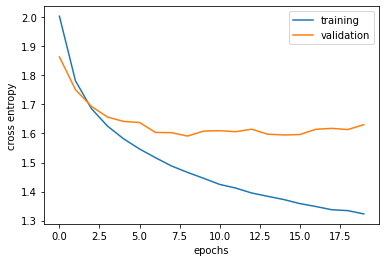

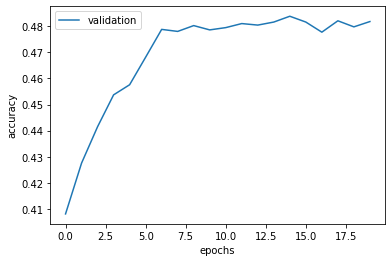

<Figure size 432x288 with 0 Axes>

In [30]:
import matplotlib.pyplot as plt

plt.plot(training_loss_list, label="training")
plt.plot(validation_loss_list, label="validation")
plt.xlabel("epochs")
plt.ylabel("cross entropy")
plt.legend()
plt.show()
plt.savefig('Loss.png')

plt.plot(validation_accuracy_list, label="validation")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()
plt.savefig('Accuracy.png')